<a href="https://colab.research.google.com/github/MJ7869/Vehicle-Warranty-Management-and-Predictive-Analytics/blob/main/Vehicle_Warranty_Management_and_Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
data=files.upload()

Saving Dataset.xlsx to Dataset.xlsx


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel("Dataset.xlsx", sheet_name=None)

In [ ]:
df_dealers=pd.read_excel("Dataset.xlsx", sheet_name="Dealers")

In [ ]:
df_customers=pd.read_excel("Dataset.xlsx", sheet_name="Customers")

In [ ]:
df_claims=pd.read_excel("Dataset.xlsx", sheet_name="Claims")

In [ ]:
df_parts=pd.read_excel("Dataset.xlsx", sheet_name="Parts")

In [ ]:
df_transactions=pd.read_excel("Dataset.xlsx", sheet_name="Transactions")

In [ ]:
df_vendors=pd.read_excel("Dataset.xlsx", sheet_name="Vendors")

**USE CASE 1**

In [ ]:
#Top 10 dealers who processed maximaum claims of the customers
df_claims.groupby("Dealer_ID")["claim_amount"].count().sort_values(ascending=False).head(10)

Dealer_ID
5       971
1       922
3       922
2       922
6       394
4       218
1262    176
1270    176
1269    176
1268    176
Name: claim_amount, dtype: int64

In [ ]:
#Top 10 parts which were most defective
df_claims.groupby("Part_ID")["claim_amount"].count().sort_values(ascending=False).head(10)

Part_ID
906    4019
901    3349
905    3349
907    3348
902    2010
903    2010
904    2010
Name: claim_amount, dtype: int64

In [ ]:
# Count of claims and sum of claim amounts for each part
part_stats = df_claims.groupby("Part_ID").agg({'claim_amount': ['sum', 'count']})

# Sorting by the sum of claim amounts in descending order
most_defective_parts = part_stats.sort_values(by=('claim_amount', 'sum'), ascending=False).head(10)
print(most_defective_parts)

        claim_amount      
                 sum count
Part_ID                   
906        190235000  4019
901        174813000  3349
905        155375000  3349
907        131242000  3348
903        105190000  2010
902         96480000  2010
904         91790000  2010


In [ ]:
# Count of claims and sum of claim amounts for each dealer
dealer10 = df_claims.groupby("Dealer_ID").agg({'claim_amount': ['sum', 'count']})

# Sorting by the sum of claim amounts in descending order
top_10_dealer = dealer10.sort_values(by=('claim_amount', 'sum'), ascending=False).head(10)
print(top_10_dealer)


          claim_amount      
                   sum count
Dealer_ID                   
5             45698000   971
1             43449000   922
3             43366000   922
2             43364000   922
6             18438000   394
4             10159000   218
1211           8399000   176
1271           8399000   176
1241           8399000   176
1273           8386000   176


In [ ]:
#Count the number of replace and repairs of each part
category_dict = {}

for i, j in zip(df_claims["Repair_or_Replace"], df_claims["Part_ID"]):
    if j in [901, 902, 903, 904, 905, 906, 907]:
            if j not in category_dict:
                category_dict[j] = {"rpr":0, "rplc":0}
            if i=="rpr":
                category_dict[j]["rpr"] += 1
            else:
                category_dict[j]["rplc"] += 1


for part_id, count in category_dict.items():
    print(f"Part ID {part_id}: {count}")

Part ID 901: {'rpr': 2009, 'rplc': 1340}
Part ID 902: {'rpr': 670, 'rplc': 1340}
Part ID 903: {'rpr': 670, 'rplc': 1340}
Part ID 904: {'rpr': 0, 'rplc': 2010}
Part ID 905: {'rpr': 1340, 'rplc': 2009}
Part ID 906: {'rpr': 670, 'rplc': 3349}
Part ID 907: {'rpr': 0, 'rplc': 3348}


In [ ]:
category_dict = {}
b = []
c=[]
for repair_or_replace, part_id in zip(df_claims["Repair_or_Replace"], df_claims["Part_ID"]):
    if repair_or_replace == "rpr":
        if part_id in [901, 902, 903, 904, 905, 906, 907]:
            if part_id not in category_dict:
                category_dict[part_id] = []
            category_dict[part_id].append(part_id)
        b.append(repair_or_replace)

    elif repair_or_replace == "rplc":
        if part_id in [901, 902, 903, 904, 905, 906, 907]:
            if part_id not in category_dict:
                category_dict[part_id] = []
            category_dict[part_id].append(part_id)
        c.append(repair_or_replace)
# Print the total count of items
print(f"Total Repair: {len(b)}")
print(f"Total Replace: {len(c)}")

# Access the counts for each category
for key, value in category_dict.items():
    print(f"Category {key}: {len(value)}")


Total Repair: 5359
Total Replace: 14736
Category 901: 3349
Category 902: 2010
Category 903: 2010
Category 904: 2010
Category 905: 3349
Category 906: 4019
Category 907: 3348


In [ ]:
df_claims["Month"]=df_claims["claim_date"].dt.month
df_claims["Year"]=df_claims["claim_date"].dt.year
df_claims["Month & Year"] = df_claims['Month'].astype(str) + "-" + df_claims["Year"].astype(str)

In [ ]:
df_claims.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Month,Year,Month & Year
0,1,2020-04-01,36000,5,104,901,rpr,4,2020,4-2020
1,2,2020-04-01,42000,6,106,902,rplc,4,2020,4-2020
2,3,2020-04-01,45000,4,103,903,rpr,4,2020,4-2020
3,4,2020-04-01,56000,3,102,904,rplc,4,2020,4-2020
4,5,2020-04-01,39000,2,105,905,rpr,4,2020,4-2020


In [ ]:
# Assuming you have columns named 'Month', 'Year', and 'Dealer_ID' in your dataframe
monthly_stats = df_claims.groupby(['Year','Month', 'Dealer_ID']).agg(
    total_claim_count=('claim_amount', 'count')
).reset_index()

print(monthly_stats)

     Year  Month  Dealer_ID  total_claim_count
0    2020      4          1                 63
1    2020      4          2                 63
2    2020      4          3                 63
3    2020      4          4                 15
4    2020      4          5                 66
..    ...    ...        ...                ...
406  2021      1       1991                162
407  2021      1       1992                162
408  2021      1       1993                162
409  2021      1       1994                162
410  2021      1       1995                162

[411 rows x 4 columns]


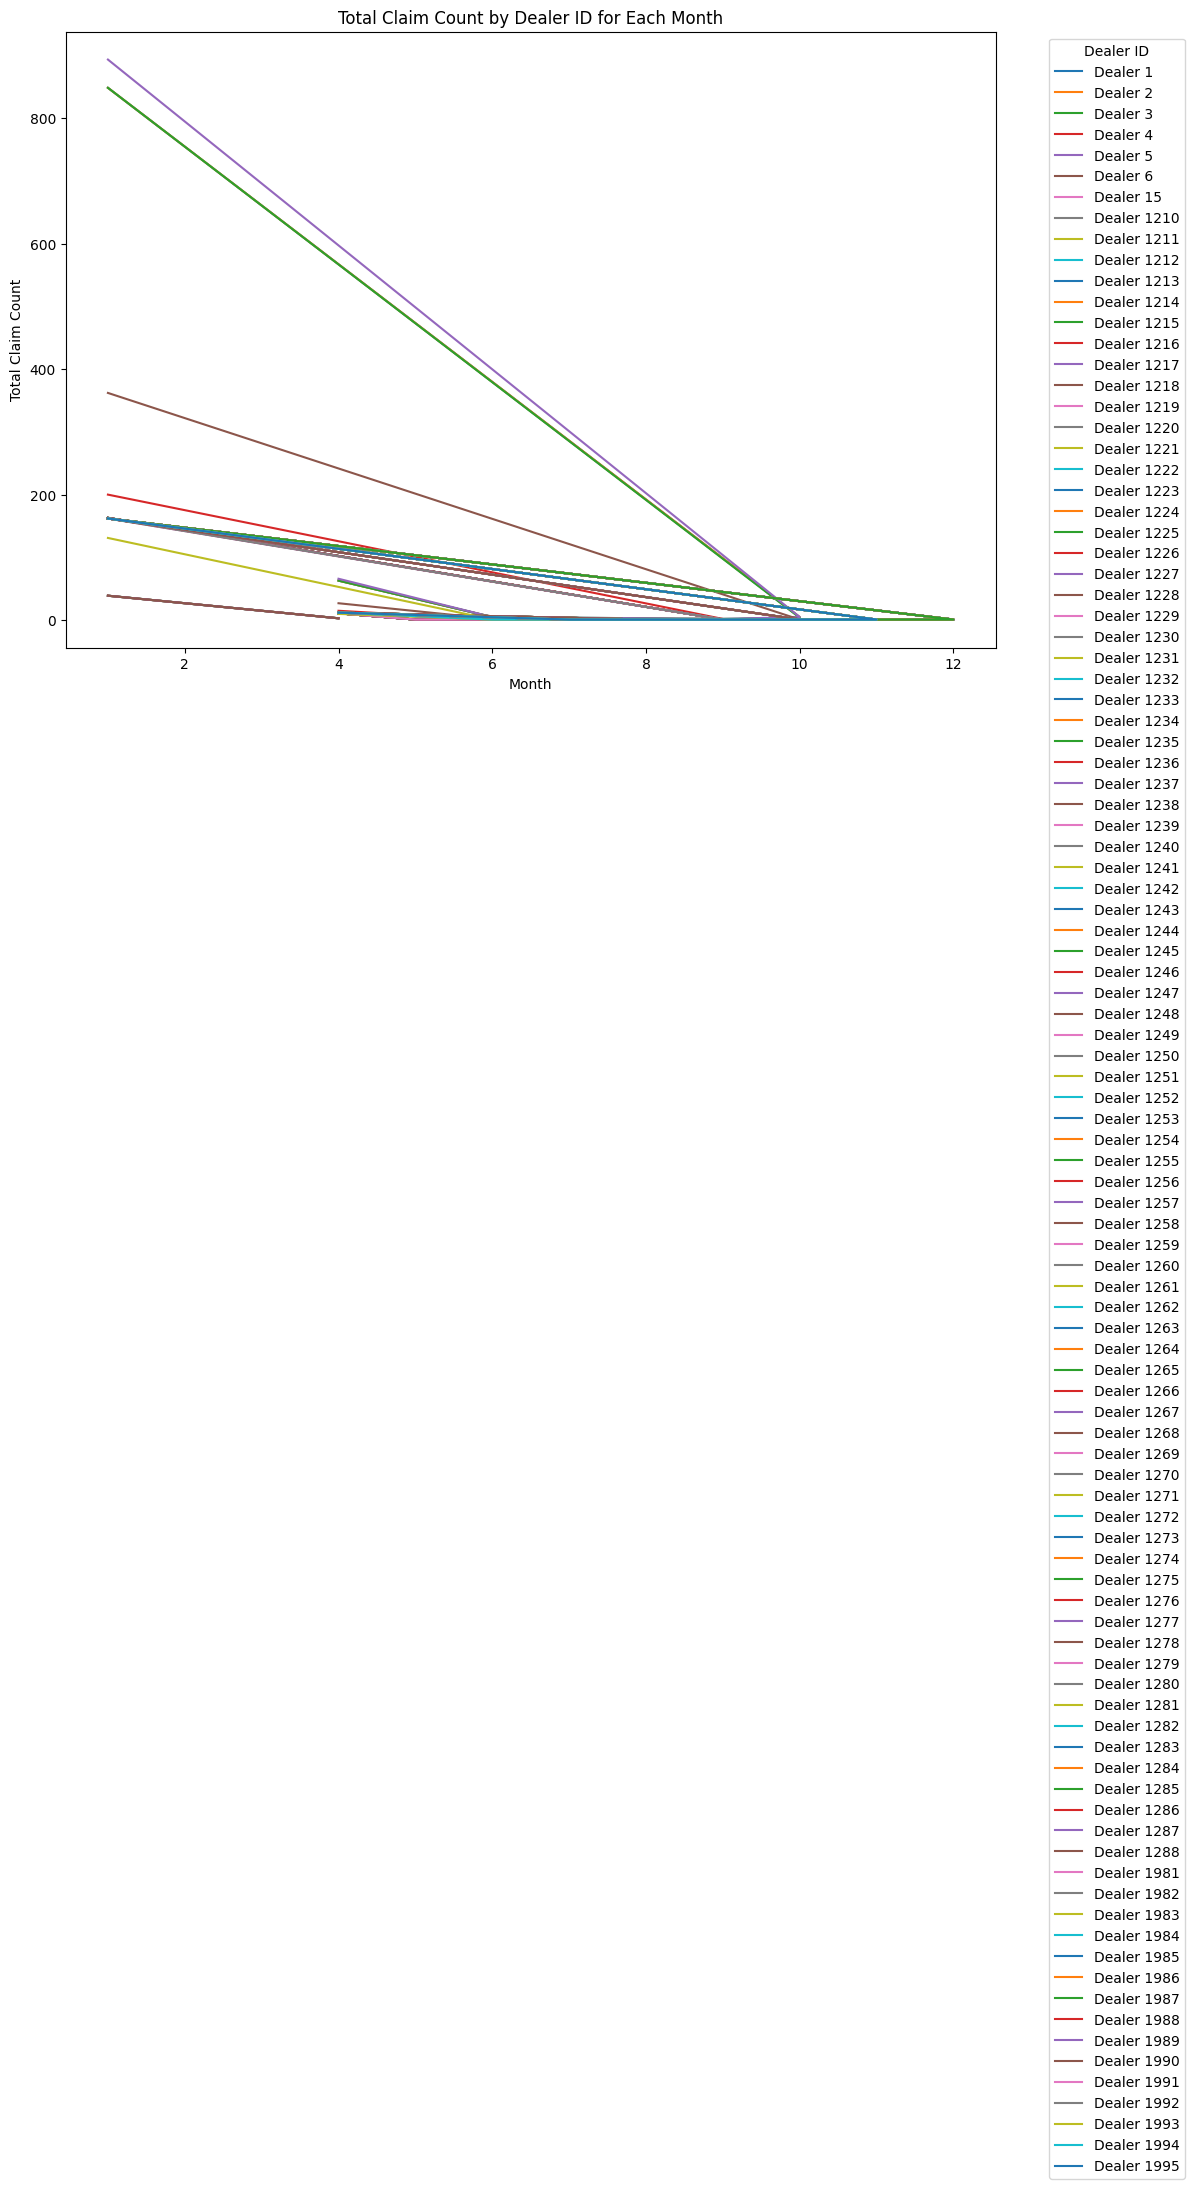

In [ ]:
plt.figure(figsize=(12, 8))

for dealer_id in monthly_stats['Dealer_ID'].unique():
    dealer_data = monthly_stats[monthly_stats['Dealer_ID'] == dealer_id]
    plt.plot(dealer_data['Month'], dealer_data['total_claim_count'], label=f'Dealer {dealer_id}')

plt.xlabel('Month')
plt.ylabel('Total Claim Count')
plt.title('Total Claim Count by Dealer ID for Each Month')

plt.legend(title='Dealer ID', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [ ]:
# Assuming you have columns named 'Month', and 'Part_ID' in your dataframe
monthly_statss = df_claims.groupby(['Year','Month', 'Part_ID']).agg(
    total_claim_count=('claim_amount', 'count')
).reset_index()

print(monthly_statss)

    Year  Month  Part_ID  total_claim_count
0   2020      4      901                224
1   2020      4      902                134
2   2020      4      903                135
3   2020      4      904                134
4   2020      4      905                223
..   ...    ...      ...                ...
65  2021      1      903               1851
66  2021      1      904               1851
67  2021      1      905               3085
68  2021      1      906               3702
69  2021      1      907               3085

[70 rows x 4 columns]


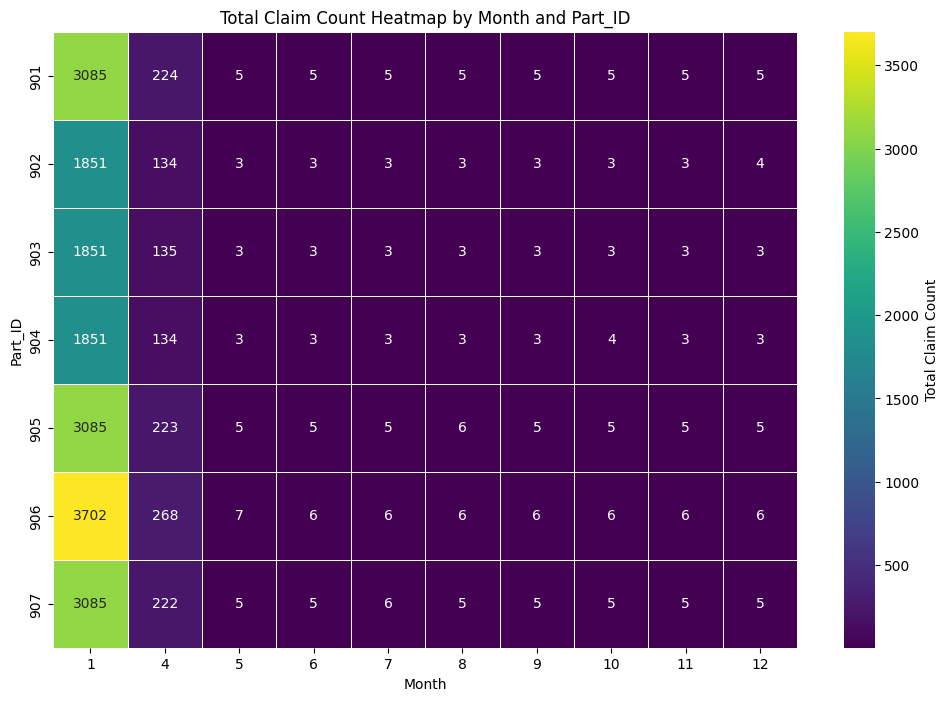

In [ ]:
# Pivot the dataframe to create a matrix suitable for a heatmap
heatmap_data = monthly_statss.pivot(index='Part_ID', columns='Month', values='total_claim_count')

# Set up the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g', linewidths=.5, cbar_kws={'label': 'Total Claim Count'})
plt.title('Total Claim Count Heatmap by Month and Part_ID')
plt.show()


**USE CASE NUMBER 2**

In [ ]:
df_customers["City"].unique()

array(['panaji', 'banglore', 'ahemadabad', 'cuttack', 'noida', 'mumbai'],
      dtype=object)

In [ ]:
#Dummy data of the mileage
min_mileage=1
max_mileage=10000
dummy_mileage=np.random.randint(min_mileage, max_mileage,size=20095)
print(dummy_mileage)

[ 950 5221 6006 ... 4307 8192 4332]


In [ ]:
#Dummy data of the age of the vehicle
min_age=1
max_age=20
dummy_age=np.random.randint(min_age, max_age, size=20095)
print(dummy_age)

[ 7 12 13 ...  2 14  4]


In [ ]:
#Dummy data of the location
location=['panaji', 'banglore', 'ahemadabad', 'cuttack', 'noida', 'mumbai']
dummy_location=np.random.choice(location, size=20095)
print(dummy_location)

['ahemadabad' 'banglore' 'cuttack' ... 'panaji' 'mumbai' 'mumbai']


In [ ]:
df_claims["Mileage"]=dummy_mileage

In [ ]:
df_claims["Vehcile's Age"]=dummy_age

In [ ]:
df_claims["Location"]=dummy_location

In [ ]:
df_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20095 entries, 0 to 20094
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   claim_id           20095 non-null  int64         
 1   claim_date         20095 non-null  datetime64[ns]
 2   claim_amount       20095 non-null  int64         
 3   Dealer_ID          20095 non-null  int64         
 4   Cust_ID            20095 non-null  int64         
 5   Part_ID            20095 non-null  int64         
 6   Repair_or_Replace  20095 non-null  object        
 7   Month              20095 non-null  int64         
 8   Year               20095 non-null  int64         
 9   Month & Year       20095 non-null  object        
 10  Mileage            20095 non-null  int64         
 11  Vehcile's Age      20095 non-null  int64         
 12  Location           20095 non-null  object        
dtypes: datetime64[ns](1), int64(9), object(3)
memory usage: 2.0+ 

In [ ]:
df_claims.pop("claim_date")
df_claims.head()

,claim_id,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Month,Year,Month & Year,Mileage,Vehcile's Age,Location
0,1,36000,5,104,901,rpr,4,2020,4-2020,950,7,ahemadabad
1,2,42000,6,106,902,rplc,4,2020,4-2020,5221,12,banglore
2,3,45000,4,103,903,rpr,4,2020,4-2020,6006,13,cuttack
3,4,56000,3,102,904,rplc,4,2020,4-2020,8308,4,noida
4,5,39000,2,105,905,rpr,4,2020,4-2020,5576,8,cuttack


In [ ]:
df1=pd.get_dummies(df_claims.Repair_or_Replace)


In [ ]:
df_claims=pd.concat([df_claims,df1],axis=1)

In [ ]:
df_claims.pop("Repair_or_Replace")

0         rpr
1        rplc
2         rpr
3        rplc
4         rpr
         ... 
20090    rplc
20091    rplc
20092    rplc
20093    rplc
20094     rpr
Name: Repair_or_Replace, Length: 20095, dtype: object

In [ ]:
df_claims.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Month,Year,Month & Year,Mileage,Vehcile's Age,Location,rplc,rpr
0,1,2020-04-01,36000,5,104,901,4,2020,4-2020,6686,18,banglore,0,1
1,2,2020-04-01,42000,6,106,902,4,2020,4-2020,4402,18,panaji,1,0
2,3,2020-04-01,45000,4,103,903,4,2020,4-2020,6446,3,cuttack,0,1
3,4,2020-04-01,56000,3,102,904,4,2020,4-2020,6657,12,panaji,1,0
4,5,2020-04-01,39000,2,105,905,4,2020,4-2020,6735,13,banglore,0,1


In [ ]:
#LAbel encoding the part_id for the conversion from integers into categorical labels unsing label encoder
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df_claims['Part_ID'] = lb.fit_transform(df_claims['Part_ID'])

In [ ]:
df_claims

,claim_id,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Month,Year,Month & Year,Mileage,Vehcile's Age,Location
0,1,36000,5,104,0,rpr,4,2020,4-2020,950,7,ahemadabad
1,2,42000,6,106,1,rplc,4,2020,4-2020,5221,12,banglore
2,3,45000,4,103,2,rpr,4,2020,4-2020,6006,13,cuttack
3,4,56000,3,102,3,rplc,4,2020,4-2020,8308,4,noida
4,5,39000,2,105,4,rpr,4,2020,4-2020,5576,8,cuttack
...,...,...,...,...,...,...,...,...,...,...,...,...
20090,20091,53000,1274,43974,5,rplc,1,2021,1-2021,714,1,ahemadabad
20091,20092,36000,1275,43975,6,rplc,1,2021,1-2021,7051,4,noida
20092,20093,46000,1276,43976,4,rplc,1,2021,1-2021,4307,2,panaji
20093,20094,56000,1277,43977,3,rplc,1,2021,1-2021,8192,14,mumbai


In [ ]:
x=df_claims[["Mileage", "Vehcile's Age"]]
y=df_claims["Part_ID"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.8)

In [ ]:
#algorithm Logisitc Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(x_test)

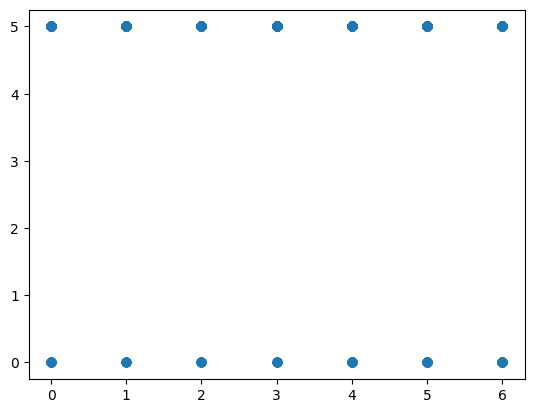

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.2095048519532222

In [ ]:
#Algorithm 2- Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()  #kept n=5 as there is not much difference from the values of n=1 to n=50

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_preddd=rfc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_preddd)

0.15202786762876339

**USE CASE 3**

In [ ]:

df_claims["Repair_or_Replace_Encoded"]=lb.fit_transform(df_claims["Repair_or_Replace"])

In [ ]:
x=df_claims[["Part_ID","Mileage", "Vehcile's Age"]]
y=df_claims["Repair_or_Replace_Encoded"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,train_size=0.7)

In [ ]:
#Algorithm 1- Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [ ]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pre = dtc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pre)

0.6909935312655499

In [ ]:
#Algorithm 2 - Random Forest
rf=RandomForestClassifier(n_estimators=10)

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_predd=rfc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_predd)

0.6996185105324266

**USE CASE 4**

In [ ]:
#Dummy data for feedback by the customer
#import random
feedback=[1,2,3,4,5]
dummy_feed=np.random.choice(feedback,size=20095)

In [ ]:
#dummy data of churn rate of every dealer
dummy_churn=np.random.uniform(0,1, size=20095)

In [ ]:
#dummy data for the preference of other dealer within the same area
pref=["1", "0"]     #Yes-1 and No-0
dummy_pref_other_location=np.random.choice(pref, size=20095)

In [ ]:
#dummy data for the change in the base location
chan=["1", "0"]     #Yes-1 and No-0
dummy_change_location=np.random.choice(chan, size=20095)


In [ ]:
df_claims["Customer_Feedback"]=dummy_feed

In [ ]:
df_claims["Churn_Rate"]=dummy_churn

In [ ]:
df_claims["Preference_Other_Location"]=dummy_pref_other_location

In [ ]:
df_claims["Change_Location"]=dummy_change_location

In [ ]:
df_claims.head()

,claim_id,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Month,Year,Month & Year,Mileage,Vehcile's Age,Location,Repair_or_Replace_Encoded,Customer_Feedback,Churn_Rate,Preference_Other_Location,Change_Location
0,1,36000,5,104,0,rpr,4,2020,4-2020,950,7,ahemadabad,1,1,0.475756,1,0
1,2,42000,6,106,1,rplc,4,2020,4-2020,5221,12,banglore,0,4,0.457102,1,1
2,3,45000,4,103,2,rpr,4,2020,4-2020,6006,13,cuttack,1,5,0.148077,0,1
3,4,56000,3,102,3,rplc,4,2020,4-2020,8308,4,noida,0,2,0.674432,0,0
4,5,39000,2,105,4,rpr,4,2020,4-2020,5576,8,cuttack,1,3,0.596251,0,1


In [ ]:
x1=df_claims[["Customer_Feedback", "Churn_Rate","Preference_Other_Location","Change_Location"]]
y1=df_claims["Dealer_ID"]

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x1,y1,train_size=.6, random_state=50)

In [ ]:
#Algorithm No 1- Random Forest
rff=RandomForestClassifier(n_estimators=10)

In [ ]:
rff.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
y_pr=rff.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pr)*100

1.6670813635232644

In [ ]:
#Algorithm No 2- Support Vector Machine
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.svm import SVC
svc=SVC()

In [ ]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
svc.fit(x_train_scaled, y_train)

SVC()

In [ ]:
y_p=svc.predict(x_test_scaled)

In [ ]:
accuracy_score(y_test,y_p)

0.05026125901965663